<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-столбца" data-toc-modified-id="Удаление-столбца-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Удаление столбца</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Анализ-таргета" data-toc-modified-id="Анализ-таргета-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Анализ таргета</a></span></li><li><span><a href="#Лемматизация-и-очистка-текста" data-toc-modified-id="Лемматизация-и-очистка-текста-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Лемматизация и очистка текста</a></span></li><li><span><a href="#Анализ-текста" data-toc-modified-id="Анализ-текста-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Анализ текста</a></span><ul class="toc-item"><li><span><a href="#Количество-слов-в-комментариях" data-toc-modified-id="Количество-слов-в-комментариях-1.2.5.1"><span class="toc-item-num">1.2.5.1&nbsp;&nbsp;</span>Количество слов в комментариях</a></span></li><li><span><a href="#Самые-популярные-слова" data-toc-modified-id="Самые-популярные-слова-1.2.5.2"><span class="toc-item-num">1.2.5.2&nbsp;&nbsp;</span>Самые популярные слова</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Дерево-классификации" data-toc-modified-id="Дерево-классификации-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево классификации</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Пассивно-агрессивная-классификация" data-toc-modified-id="Пассивно-агрессивная-классификация-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Пассивно-агрессивная классификация</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ</a></span></li></ul></li><li><span><a href="#Тестирование-и-Выводы" data-toc-modified-id="Тестирование-и-Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование и Выводы</a>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Загрузка и подготовка данных

Загрузим необходимые библиотеки

In [1]:
!pip install scikit-learn==1.1.3 -q
!pip install matplotlib==3.5.2 -q
!pip install optuna -q

Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
import optuna
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

Закрепим необходимые константы:

In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Загрузка данных

In [4]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    print('Датасет не найден')

### Подготовка данных

In [5]:
def first_look(df):
    df.info()
    return display('Первые 5 строк', df.head(5), 'Последние 5 строк', df.tail(5))

Выполним первоначальный осмотр данных

In [6]:
first_look(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


'Первые 5 строк'

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


'Последние 5 строк'

,Unnamed: 0,text,toxic
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0
159291,159450,"""\nAnd ... I really don't think you understand...",0


Помимо необходимых столбцов с меткой комментария и самим комментарием в выгруженном датасете есть столбец с номером строки. Также можно отметить, что столбец с номером строки в некоторый момент прерывается - об этом говорит несовпадение номера и индексом строки. Пропусков в данных нет. Среднее значение столбца toxic говорит о том, что в основной своей массе комментарии не являются токсичными.

#### Удаление столбца

In [7]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

#### Поиск дубликатов

In [8]:
data.duplicated().sum()

0

Дубликаты отсутствуют.

#### Анализ таргета

Уникальные значения в столбце toxic и частота их появления:

In [9]:
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

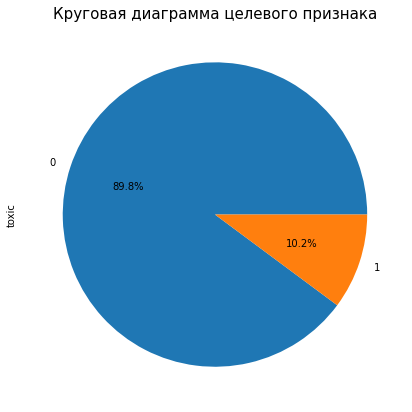

In [10]:
data['toxic'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (9, 7))
plt.title('Круговая диаграмма целевого признака', size = 15)
plt.show()

В основной своей массе комментарии не являются токсичными.

#### Лемматизация и очистка текста

Загрузим словарь стоп-слов

In [11]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))#.add({'I'})

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Выполним лемматизацию текста

In [48]:
wordnet = WordNetLemmatizer()

In [51]:
def lemmatization(text):
    lemmas = []
    clear_text = re.sub(r'[^a-zA-Z]',' ',text.lower())
    tagged = pos_tag(word_tokenize(clear_text))
    for token, tag in tagged:
        pos = tag[0].lower()
        if pos not in ['a','n','v','r']:
            pos = 'n'
        lemma = wordnet.lemmatize(token,pos)
        if lemma not in stopwords:
            lemmas.append(lemma)
    return ' '.join(lemmas)

Выполним пробную лемматизацию:

In [52]:
sentence1 = "The striped bats are hanging on their feet for best!!"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])

In [53]:
df_my['text'] = df_my['text'].map(lemmatization)
df_my

,text
0,dawa strip bat hang foot best
1,ashamed go work


Лемматизация выполнена успешно. Можно проводить лемматизацию на основном датасете.

In [18]:
%%time
data['text_lemm'] = data['text'].map(lemmatization)

CPU times: user 9min 58s, sys: 3.91 s, total: 10min 2s
Wall time: 10min 7s


In [19]:
data['text_lemm'].head(5)

0    explanationwhy edits make username hardcore me...
1    daww match background colour im seemingly stic...
2    hey man im really try edit war guy constantly ...
3    morei cant make real suggestion improvement wo...
4                  sir hero chance remember page thats
Name: text_lemm, dtype: object

#### Анализ текста

##### Количество слов в комментариях

In [20]:
def num_words(text):
    return len(text.split())

Найдем число слов в каждом комментарии

In [21]:
data['num_words'] = data['text_lemm'].map(num_words)

Проверим наличие пустых комментариев после проведения лемматизации.

In [22]:
data[data['num_words'] == 0].head(10)

,text,toxic,text_lemm,num_words
2400,"Here, here and here.",0,,0
4475,1993\n\n1994\n\n1995\n\n1996\n\n1997\n\n1998\n...,0,,0
6289,193.61.111.53 15:00,0,,0
8824,What is I 78.146.102.144,0,,0
9373,They do too. their ... -,0,,0
10193,"64.86.141.133""",0,,0
11979,(What I have done) (What have I done?),0,,0
17280,~ \n\n68.193.147.157,0,,0
23051,Where was it before?,0,,0
23485,between 1991 and 1999,0,,0


In [23]:
len(data[data['num_words'] == 0])

52

После выполнения очистки от стоп-слов и лемматизации некоторые комментарии остались пустыми. Полный текст комментария также не позволяет назвать его особенно содержательным: не приводятся источники, в основном содержат оценочные суждения.
От них можно избавиться, так как менее они не внесут полезных данных обучаемым моделям.

In [24]:
data = data.query('num_words > 0')

In [25]:
data.pivot_table(
    index = 'toxic',
    values = 'num_words',
    aggfunc = ['max','mean','min'])

,max,mean,min
,num_words,num_words,num_words
toxic,,,
0,1250,34.520898,1
1,1250,27.985048,1


Анализ показывает, что в среднем нетоксичные комментарии длиннее, однако это не панацея: так максимальное количество слов зафиксировано в токсичном комментарии. 

##### Самые популярные слова

In [26]:
def counter(text):
    return Counter(text.split())

In [27]:
data.query('toxic == 1')['text_lemm'].map(counter).sum().most_common(10)

[('fuck', 10717),
 ('suck', 4280),
 ('go', 4193),
 ('like', 3891),
 ('dont', 3817),
 ('shit', 3394),
 ('nigger', 3386),
 ('wikipedia', 3365),
 ('get', 3306),
 ('u', 3030)]

**Вывод:** выполнена загрузка и подготовка данных для дальнейшего обучения моделей: данные чистые, большинство комментариев не являются токсичными, в выгруженных данных обнаружен столбец с номером строки, не несущий полезной информации. Выполнена лемматизация и очистка текста для лучшего обучения, добавлен признак - количество лемматизированных слов в комментарии.

## Обучение

Разделим на тренировочную, валидационную и тестовую выборки

In [28]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop(['text','toxic'], axis = 1),
    data['toxic'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = data['toxic'])

### Дерево классификации

In [29]:
def tree_objective(trial):
    
    ngram_range = trial.suggest_categorical('ngram_range', [(1,1),(2,2),(3,3)])
    
    preprocessor = ColumnTransformer(
    [
    ('tf', TfidfVectorizer(stop_words = stopwords, ngram_range = ngram_range), 'text_lemm')
    ], remainder = 'passthrough')
    
    max_depth = trial.suggest_int('max_depth', 20, 35)
    min_samples_split = trial.suggest_int('min_samples_split', 10, 25)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10)
    
    model =  model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(max_depth=max_depth,
                                              min_samples_split=min_samples_split,
                                              min_samples_leaf=min_samples_leaf,
                                              random_state=RANDOM_STATE))
    ])
    
        
    return cross_val_score(model, X_train, y_train, scoring = 'f1', cv = 3, n_jobs = -1).mean()

In [30]:
tree_study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))  
tree_study.optimize(tree_objective, n_trials=15)

[I 2025-06-25 18:55:02,958] A new study created in memory with name: no-name-d0bc138d-4091-4d77-9ddc-36796ec1dc58
[I 2025-06-25 18:57:57,501] Trial 0 finished with value: 0.21366438769135096 and parameters: {'ngram_range': (2, 2), 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.21366438769135096.
[I 2025-06-25 19:00:56,313] Trial 1 finished with value: 0.21065223469853997 and parameters: {'ngram_range': (2, 2), 'max_depth': 31, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.21366438769135096.
[I 2025-06-25 19:01:39,672] Trial 2 finished with value: 0.6449470388502485 and parameters: {'ngram_range': (1, 1), 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6449470388502485.
[I 2025-06-25 19:04:45,257] Trial 3 finished with value: 0.030181249263562762 and parameters: {'ngram_range': (3, 3), 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is

Достигнутое значение метрики f1 на модели дерева классификации равно:

In [31]:
tree_f1 = round(tree_study.best_value, 3)
f'Достигнутое значение кросс-валидационной метрики f1 на модели дерева классификации равно:{tree_f1:.3f}'

'Достигнутое значение кросс-валидационной метрики f1 на модели дерева классификации равно:0.673'

При этом параметры модели следующие:

In [32]:
best_params_tree = tree_study.best_params
best_params_tree

{'ngram_range': (1, 1),
 'max_depth': 34,
 'min_samples_split': 25,
 'min_samples_leaf': 9}

### Логистическая регрессия

In [33]:
def log_objective(trial):
      
    
    preprocessor = ColumnTransformer(
    [
    ('tf', TfidfVectorizer(stop_words = stopwords), 'text_lemm')
    ], remainder = 'passthrough')
    
    C = trial.suggest_float('C', 3, 10)
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, random_state=RANDOM_STATE))
    ])
    

    return cross_val_score(model, X_train, y_train, scoring = 'f1', cv = 3, n_jobs = -1).mean()

In [34]:
log_study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))  
log_study.optimize(log_objective, n_trials=10)

[I 2025-06-25 19:26:07,856] A new study created in memory with name: no-name-995ade6d-9963-4510-b976-642c3ae282d2
[I 2025-06-25 19:28:53,025] Trial 0 finished with value: 0.758312189289307 and parameters: {'C': 5.621780831931537}. Best is trial 0 with value: 0.758312189289307.
[I 2025-06-25 19:31:30,397] Trial 1 finished with value: 0.7559488730679468 and parameters: {'C': 9.655000144869414}. Best is trial 0 with value: 0.758312189289307.
[I 2025-06-25 19:34:03,161] Trial 2 finished with value: 0.7599513374944143 and parameters: {'C': 8.123957592679837}. Best is trial 2 with value: 0.7599513374944143.
[I 2025-06-25 19:36:42,085] Trial 3 finished with value: 0.7502897166118981 and parameters: {'C': 7.190609389379256}. Best is trial 2 with value: 0.7599513374944143.
[I 2025-06-25 19:39:26,952] Trial 4 finished with value: 0.7543245864398492 and parameters: {'C': 4.092130483097056}. Best is trial 2 with value: 0.7599513374944143.
[I 2025-06-25 19:41:48,661] Trial 5 finished with value: 0.

In [35]:
log_f1 = round(log_study.best_value, 3)
f'Достигнутое значение кросс-валидационной метрики f1 на модели логистической регрессии равно:{log_f1:.3f}'

'Достигнутое значение кросс-валидационной метрики f1 на модели логистической регрессии равно:0.762'

При этом параметры модели следующие:

In [36]:
best_params_log = log_study.best_params
best_params_log

{'C': 9.063233020424546}

### Пассивно-агрессивная классификация

In [37]:
def pac_objective(trial):
        
    ngram_range = trial.suggest_categorical('ngram_range', [(1,1),(2,2),(3,3)])
    
    preprocessor = ColumnTransformer(
    [
    ('tf', TfidfVectorizer(stop_words = stopwords, ngram_range = ngram_range), 'text_lemm')
    ], remainder = 'passthrough')
    
    C = trial.suggest_float('C', 0, 5)
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', PassiveAggressiveClassifier(C=C,
                                                   max_iter=50,
                                                   random_state=RANDOM_STATE))
    ])
    

    return cross_val_score(model, X_train, y_train, scoring = 'f1', cv = 3, n_jobs = -1).mean()

In [38]:
pac_study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))  
pac_study.optimize(pac_objective, n_trials=15)

[I 2025-06-25 19:51:34,197] A new study created in memory with name: no-name-fafa352d-af97-4e36-8ddd-237e401be4ab
[I 2025-06-25 19:52:22,971] Trial 0 finished with value: 0.2958237368645487 and parameters: {'ngram_range': (2, 2), 'C': 2.993292420985183}. Best is trial 0 with value: 0.2958237368645487.
[I 2025-06-25 19:52:40,483] Trial 1 finished with value: 0.6545812426434966 and parameters: {'ngram_range': (1, 1), 'C': 4.330880728874676}. Best is trial 1 with value: 0.6545812426434966.
[I 2025-06-25 19:53:30,280] Trial 2 finished with value: 0.2958237368645487 and parameters: {'ngram_range': (2, 2), 'C': 4.8495492608099715}. Best is trial 1 with value: 0.6545812426434966.
[I 2025-06-25 19:53:47,353] Trial 3 finished with value: 0.6546527903284405 and parameters: {'ngram_range': (1, 1), 'C': 0.9170225492671691}. Best is trial 3 with value: 0.6546527903284405.
[I 2025-06-25 19:54:36,906] Trial 4 finished with value: 0.2951075589383842 and parameters: {'ngram_range': (2, 2), 'C': 1.45614

In [39]:
pac_f1 = round(pac_study.best_value, 3)
f'Достигнутое значение кросс-валидационной метрики f1 на модели пассивно-агрессивной классификации равно:{pac_f1:.3f}'

'Достигнутое значение кросс-валидационной метрики f1 на модели пассивно-агрессивной классификации равно:0.700'

При этом параметры модели следующие:

In [40]:
best_params_pac = pac_study.best_params
best_params_pac

{'ngram_range': (1, 1), 'C': 0.026485604069959676}

### Анализ

In [41]:
results = pd.DataFrame(data = {'tree': [tree_f1],
                               'log':[log_f1],
                               'pac':[pac_f1]},
                       index = ['f1_cross_val'])

results

,tree,log,pac
f1_cross_val,0.673,0.762,0.7


**Вывод:** наибольшее значение метрики f1 на валидационной выборке 0.762, что удовлетворяет условию F1 не меньше 0.75, достигнуто моделью логистической регрессии. Гиперпараметр модели: 'С': 9.06. Поскольку моделью дерева классификации, пассивно-агрессивной классификацией не достигнуто требуемое значение метрики, необходимо выбрать логистическую регрессию.

## Тестирование и Выводы

In [43]:
preprocessor = ColumnTransformer(
    [
    ('tf', TfidfVectorizer(stop_words = stopwords), 'text_lemm')
    ], remainder = 'passthrough')
        
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=best_params_log['C'],
                               random_state=RANDOM_STATE))
    ])

In [44]:
model.fit(X_train,y_train)

preds = model.predict(X_test)

In [45]:
f'Достигнутое значение метрики f1 на тестовых данных моделью логистической регрессии равно: {f1_score(y_test,preds):.3f}'

'Достигнутое значение метрики f1 на тестовых данных моделью логистической регрессии равно: 0.767'

**Анализ наиболее значимых слов для отнесения комментария к токсичному**

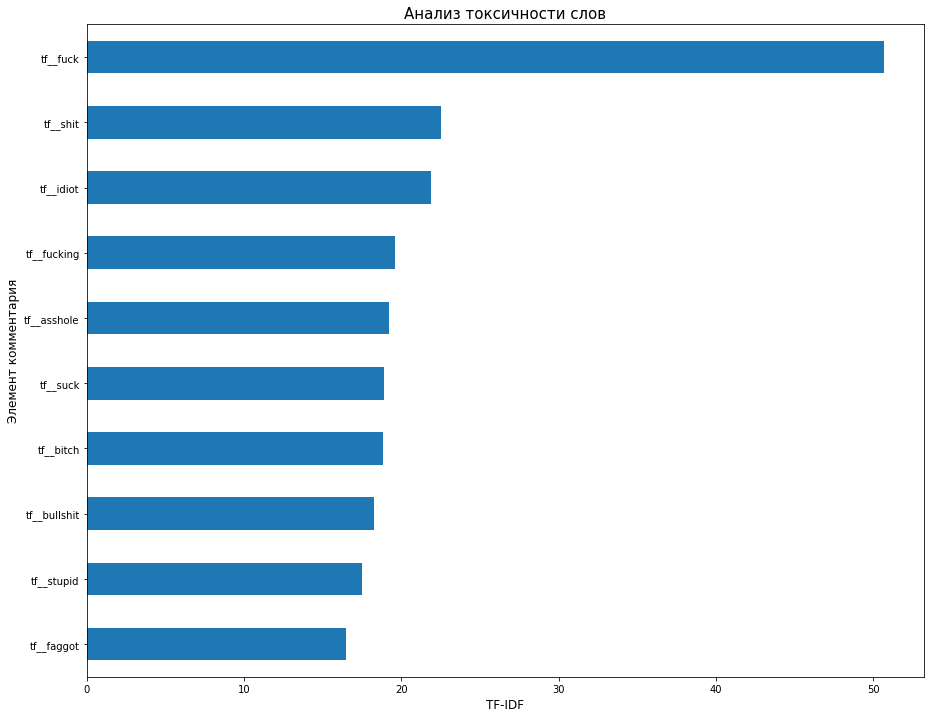

In [46]:
# [:-1] - срез, неучитывающий признак "число слов в комментарие"

f_imp = pd.Series(index = model.named_steps['preprocessor'].get_feature_names_out()[:-1],
                  data = abs(model.named_steps['classifier'].coef_[0][:-1]))


(f_imp
     .sort_values(ascending = False)
     .head(10)
     .sort_values()
     .plot.barh(figsize = (15,12))
)

plt.title('Анализ токсичности слов', size = 15)
plt.xlabel('TF-IDF', size = 12)
plt.ylabel('Элемент комментария', size = 12)

plt.show()

In [47]:
f_imp.sort_values(ascending = False)

tf__fuck          50.674622
tf__shit          22.552160
tf__idiot         21.895110
tf__fucking       19.593338
tf__asshole       19.200189
                    ...    
tf__ecosystem      0.000031
tf__orlando        0.000015
tf__pt             0.000014
tf__peacefully     0.000002
tf__oligarchy      0.000001
Length: 211922, dtype: float64

Анализ показал, что модель работает логично, отсортировывая наиболее негативнонастроенные комментарии.

Был проведен анализ комментариев и правок интернет-магазина «Викишоп» и создание модели классификации комментариев на позитивные и негативные.

**В первой части работы** была выполнена загрузка и предобработка данных при которой был выявлен столбец, не несущий полезной информации, установлено, что пропуски и дубликаты отсутствуют, большинство комментариев не являются токсичными.

Дополнительно проведена очистка от символов и лемматизация комментариев.

**Во второй части работы** было проведено обучение моделей, классифицирующих комментарии на позитивные и негативные. 

*Для дерева классификации* были найдены оптимальные гиперпараметры: 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 10, - предсказан целевой признак для валидационной выборки, а также вычислена метрика f1 модели = 0.672.

*Для модели логистической регрессии* аналогично найден оптимальный гиперпараметр:   'C': 9.06 - предсказан целевой признак для валидационной выборки, а также вычислена метрика f1 модели = 0.762.

Только модель логистичесокй регрессии удовлетворяют условию, поставленному бизнесом: f1 > 0.75.

**Анализ моделей** показал, что логистическая регрессия точнее предсказывает целевой показатель на валидационной выборке, нежели дерево классификации и пассивно-агрессивная классификация. Рекомендуется к внедрению система логистической регрессии.

Для выбранной модели предсказан целевой признак и вычислена метрика f1 на тестовых данных: 0.767.